<a href="https://colab.research.google.com/github/KingYuanSun/DeepLearningResearch/blob/master/NLP_2_skipgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/graykode/nlp-tutorial

Epoch: 1000 cost = 2.332488
Epoch: 2000 cost = 1.965095
Epoch: 3000 cost = 2.089952
Epoch: 4000 cost = 2.188056
Epoch: 5000 cost = 1.979056


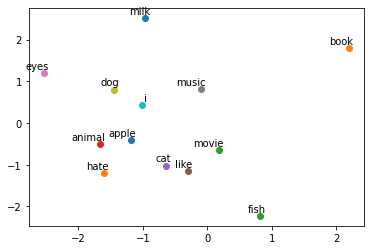

In [2]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode
'''

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

# Word2Vec Parameter
batch_size = 20
embedding_size = 2 # To show 2 dim embedding graph
voc_size = len(word_list)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(np.eye(voc_size)[data[i][1]])  # context word

    return random_inputs, random_labels

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

# Model
inputs = tf.placeholder(tf.float32, shape=[None, voc_size])
labels = tf.placeholder(tf.float32, shape=[None, voc_size])

# W and WT is not Traspose relationship
W = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
WT = tf.Variable(tf.random_uniform([embedding_size, voc_size], -1.0, 1.0))

hidden_layer = tf.matmul(inputs, W) # [batch_size, embedding_size]
output_layer = tf.matmul(hidden_layer, WT) # [batch_size, voc_size]

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch + 1)%1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

        trained_embeddings = W.eval()

for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()